Name    = "Ehtisham Ahmad"

email   = "ehtishamahmed10@gmail.com"

---------------
## Naive Bayes Algorithm

- It is a supervised learning algorithm.
- It assumes particular feature presence in a class unrelated to anyother feature in same class.
- It is based on probability of each class with certain feature.
- P(c/x) = (P(x/c)*P(c))/P(x)
- P(x)- predictor probability
- P(c)- class probability
- P(x/c)- Likelihood
- P(c/x)- Posterior probability

### Pros:
- Easy and fast.
- less training data is needed.
- Performs well in categorical variable.
### Cons:
- If a category of a categorical variable is not trained in training, then model will assign 0 value to prediction of that class.
- Also called bad estimator, not much reliance on porbability output.
- It only assumes independent predictors.

### Application:
- Real-time prediction.
- Multi-class prediction.
- Spam filtering.
- Recommendation System.


## Real time Algorithm:

In [35]:
# Load Iris dataset
# Step 1: Importing libraries the dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Classification/master/IrisDataset.csv')

In [36]:
X = dataset.iloc[:,:4].values
y = dataset['species'].values

In [40]:
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
#Step 2: Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
#Step 3: Feature Scaling(fitting the data)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
#Step 4: Training the Naive Bayes Classification model on the Training Set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [45]:
# Step 5: Predicting the Test set results
y_pred = classifier.predict(X_test) 
y_pred

array(['setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa'],
      dtype='<U10')

In [51]:
# Step 6: confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0,  6,  1],
       [ 0,  0, 11]], dtype=int64)

In [48]:
# accuracy score
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9666666666666667


In [50]:
#Step 7: Comparing the Real Values with Predicted Values
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,setosa,setosa
1,virginica,virginica
2,versicolor,versicolor
3,versicolor,versicolor
4,setosa,setosa
5,virginica,virginica
6,setosa,setosa
7,versicolor,versicolor
8,virginica,virginica
9,setosa,setosa


In this way we can classify a flower based on four features

---------------------
## K-means Clustering

- It is unsupervised learning.
- Cluster means certain data points collected on similarities.
- k means k number of centroids.
- It is based on centroid located in each cluster.
- Mean in the k-means refers to avergaing the data for centroid.
- It starts with random centroid assigning, and then produces iterations for better position of centroid.

## Real time Algorithm:

In [53]:
# Load Iris dataset
# Step 1: Importing libraries the dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


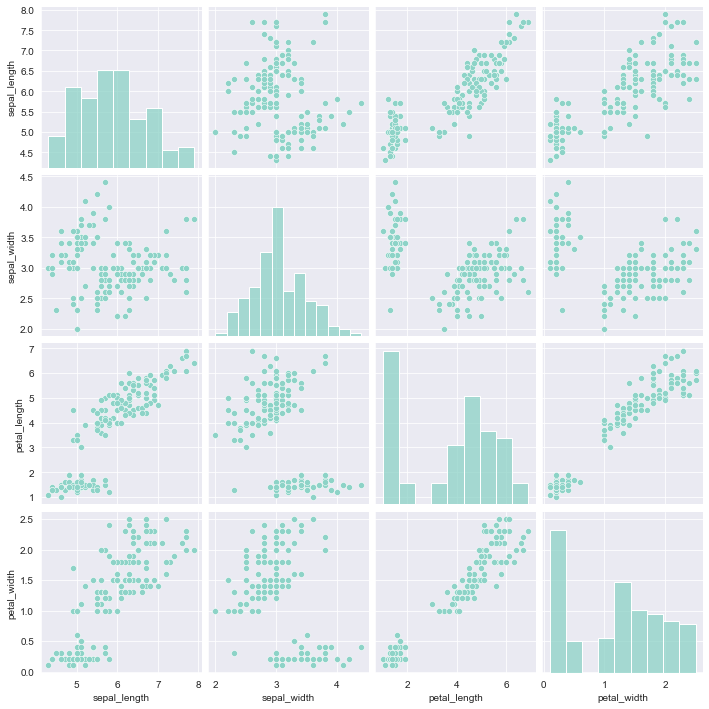

In [56]:
sns.set_style('darkgrid')
sns.pairplot(df)

In [60]:
X=df.iloc[:,[0,1,2,3]].values

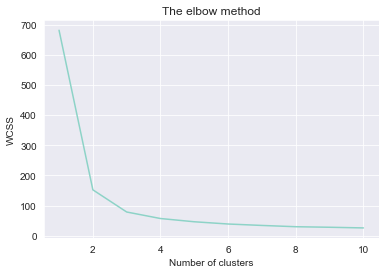

In [61]:
# finding the optimum no. of clusters for K-mean classification
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the result onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [62]:
# Applying kmeans to the dataset / creating the kmeans classifier
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=300, n_init=10, random_state=0)
y_kmeans= kmeans.fit_predict(X)

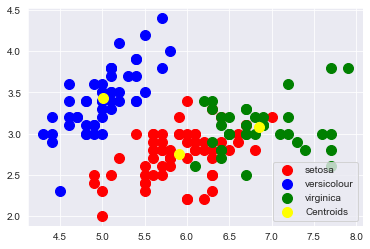

In [64]:
# visualising the clusters
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=100, c='red', label='setosa')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=100, c='blue', label='versicolour')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=100, c='green', label='virginica')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')
plt.legend()

----------------------